In [ ]:
!pip install numpy
import numpy as np
!pip install cplex
import cplex as cp
!pip install python-igraph

In [ ]:
#read alist file

def alist2sparse(filename):
    liste = []
    with open(filename, "r") as fp:
        Lines = fp.readlines()
        for line in Lines:
            liste.append(line.strip())
    int_liste=[]
    test=[]
    for line in liste:
        int_liste.append(line.split())
    for element in int_liste:
        test.append(list(map(int,element)))

    num_col = test[0][0]
    num_row = test[0][1]

    ones_col = test[1][0]
    ones_row = test[1][1]

    H = np.zeros((num_row,num_col))

    row_indices = []

    for element in test:
        # dangerous!
        if len(element) == ones_row:
            row_indices.append(element)
    for i,row in enumerate(H):
        for index in row_indices[i]:
            H[i][index-1] = 1
    return H



In [ ]:
# read qc files
def qc2sparse(qcHFileName):
    with open(qcHFileName, 'r') as fid:
        line = fid.readline().split() # Split the line on white spaces
        n = int(line[0]) # Get the first value as n
        m = int(line[1]) # Get the second value as m
        z = int(line[2]) # Get the third value as z
        I = np.eye(z, dtype=np.int32)
        Z = np.zeros((z, z), dtype=np.int32)
        H = np.empty((0,0), dtype=np.int32)
        for i in range(m):
            lH = np.empty((0,0), dtype=np.int32)
            shifts = fid.readline().split() # Split the line with shifts on white spaces
            for shift in shifts:
                shift = int(shift)
                if shift == -1:
                    if lH.size == 0:
                        lH = Z
                    else:
                        lH = np.hstack([lH, Z])
                else:
                    if lH.size == 0:
                        # NB! {a_ij} => i ~ axis 0, j ~ axis 1
                        lH =  np.roll(I, shift, axis=1)
                    else:
                        lH = np.hstack([lH, np.roll(I, shift, axis=1)])
            if H.size == 0:
                H = lH
            else:
                H = np.vstack([H, lH])
        return H



In [ ]:
def print_ndarray(H, indent = 0, space = 1):
    assert(isinstance(H, np.ndarray))
    assert(indent >= 0 and space >= 0)

    if (H.ndim != 2):
        print( "This method supports only 2-dimensional numpy.ndarray" )
        return

    if (indent > 0):
        fmt = print("%%%dd", indent)
    else:
        fmt = "%d"
    fmt = fmt + ' '*space

    mn = H.shape
    for i in range(mn[0]):
        for j in range(mn[1]):
            print(fmt % (H[i][j]), end = '')
        print("")

In [ ]:
def assertSelector(selector, n):
    assert isinstance(selector, tuple), "Selector must be a tuple"
    assert all(0 <= idx < n for idx in selector), "Invalid selector"


In [ ]:
############################## set 'a' ##############################
# (a, b)|a
_a_ = 102
# select solution with requirement VNs, X[selector] = 1, X = (x_0, ..., x_{n-1})
# selector = (10, 48 )
#selector = (10,  19,  48,  87, 148, 158, 163, 222, 268, 340, 350, 361)

#selector = (10,  19,  44,  48,  51,  59,  87, 109, 148, 158, 163, 180, 222, 228, 268, 340, 350, 361)

#TS(26, 2)
#selector = ( 10,  19,  30,  35,  44,  48,  51,  59,  61,  87, 109, 139, 148, 158, 163, 180, 222, 228, 254, 268, 273, 294, 323, 340, 350, 361)



# TS (30,4)
#selector = ( 10,  19,  30,  32,  35,  44,  48,  51,  59,  61,  87, 109, 139, 148, 158, 163, 180, 212, 222, 228, 254, 268, 273, 294, 323, 340, 350, 361, 377, 383)



# TS (36,4)
#selector = (  10,  19,  30,  32,  35,  44,  48,  50,  51,  58,  59, 61,  87, 109, 139, 148, 158, 163, 180, 212, 222, 228, 250, 254, 268, 273, 294, 323, 340, 350, 352, 356, 361, 377, 383, 403 )


# TS (40,4)
#selector = ( 10,  13,  19,  30,  32,  35,  44,  48, 50, 51,  58,  59,  61,  68,  87, 109, 129, 134, 139, 148, 158, 163, 180, 212, 222, 228, 250, 254, 268, 273, 294, 323, 340, 350, 352, 356,361, 377, 383, 403)


# TS (48,4)
#selector = ( 10,  13,  19,  30,  32,  35,  44,  47,  48,  50, 51,  57,  58,  59,  61,  68,  87, 109,129, 134, 139, 148, 158, 163, 180, 191, 212, 222, 228, 231, 250, 254, 268, 273, 280, 290,294, 323, 340, 349, 350, 352, 354, 356, 361, 377, 383, 403)


# TS (56,2)
#selector = (10,  13,  19,  21,  30,  32,  35,  44,  47,  48,  50,  51,  57,  58,  59,  61,  68,  87, 109, 116, 124, 129, 134, 139, 147, 148, 158, 162, 163, 171, 180, 191, 212, 222, 228, 231,232, 250, 254, 268, 273, 280, 290, 294, 296, 323, 340, 349, 350, 352, 354, 356, 361, 377,383, 403)


# TS (64,4)
#selector = (10,  13,  19,  21,  30,  32, 35,  40,  44,  45,  47,  48,  50,  51,  57,  58,  59, 61, 68,  87, 109, 116, 124, 129, 134, 139, 147, 148, 153, 158, 162, 163, 171, 180, 191, 212, 222, 228, 231, 232, 250, 254, 261, 268, 269, 273, 280, 290, 292, 294, 296, 311, 323, 340,349, 350, 352, 354, 356, 361, 377, 383, 400, 403)

#TS (68,4)
#selector = (10,  13,  19,  21,  24,  30,  32,  35,  40,  44,  45,  47,  48,  50,  51,  57,  58,  59, 61,  68,  87, 109, 116, 124, 129, 134, 139, 147, 148, 153, 158, 162, 163, 167, 171, 180,191, 212, 222, 228, 231, 232, 250, 254, 261, 268, 269, 273, 280, 290, 292, 294, 296, 311,323, 332, 340, 349, 350, 352, 354, 356, 361, 373, 377, 383, 400, 403)

#TS (74,2)
#selector = ( 10,  13,  19,  21,  24,  30,  32,  35,  40,  44,  45,  47,  48,  50,  51,  57,  58,  59,61,  68,  87,  97, 109, 116, 124, 129, 134, 139, 147, 148, 153, 158, 162, 163, 167, 171,174, 180, 191, 212, 215, 222, 228, 229, 231, 232, 244, 250, 254, 261, 268, 269, 273, 276,280, 290, 292, 294, 296, 311, 323, 332, 340, 349, 350, 352, 354, 356, 361, 373, 377, 383,400, 403)


#TS (80,2)
#selector = (8,  10,  13,  19,  21,  24,  30,  32,  35, 40,  44,  45,  47,  48,  50,  51,  57,  58, 59,  61,  68, 87,  97, 109, 116, 124, 129, 134, 139, 147, 148, 151, 153, 158, 162, 163, 167, 171, 174, 180, 191, 208, 212, 213, 215, 222, 228, 229, 231, 232, 244, 250, 254, 260, 261, 268, 269, 273, 276, 280, 290, 292, 294, 296, 311, 323, 332, 340, 349, 350, 352, 354,356, 358, 361, 373, 377, 383, 400, 403)


#TS (86,2)
#selector = ( 8,  10,  13,  19,  21,  24,  30,  32,  35,  40,  44,  45,  47,  48,  50,  51,  57,  58, 59,  61,  68,  82,  87,  97, 109, 116, 124, 129, 134, 139, 147, 148, 151, 153, 158, 162, 163, 167, 171, 174, 180, 191, 208, 212, 213, 215, 222, 228, 229, 231, 232, 244, 250, 254,260, 261, 268, 269, 270, 273, 276, 280, 287, 290, 292, 294, 296, 302, 311, 320, 323, 332, 340, 349, 350, 352, 354, 356, 358, 361, 373, 377, 383, 400, 403, 405)


#TS (94,2)
#selector = ( 8, 10,  13,  19,  21,  24,  30,  32,  35,  40,  44,  45,  47,  48,  50,  51,  57,  58,59,  61,  67, 68,  70,  82,  87,  97, 101, 109, 114, 116, 124, 129, 134, 139, 147, 148,151, 153, 158, 162, 163, 167, 171, 174, 177, 180, 191, 207, 208, 212, 213, 215, 222, 228,229, 231, 232, 238, 244, 250, 254, 260, 261, 268, 269, 270, 273, 276, 280, 287, 290, 292,294, 296, 302, 311, 320, 323, 332, 337, 340, 349, 350, 352, 354, 356, 358, 361, 373, 377, 383, 400, 403, 405)



#TS (102,2)

selector = (  8,   9,  10,  13,  19,  20,  21,  24,  30,  32,  35,  37,  40,  44,  45,  47,  48, 50, 51,  53,  54,  57,  58,  59,  61,  67,  68, 70,  82,  87,  97, 101, 109, 114, 116, 124,129, 134, 139, 147, 148, 151, 153, 158, 162, 163, 164, 165, 167, 171, 174, 177, 180, 191,207, 208, 212, 213, 215, 222, 228, 229, 231, 232, 238, 244, 250, 254, 260, 261, 268, 269, 270, 273, 276, 280, 282, 287, 290, 292, 294, 296, 302, 311, 320, 323, 332, 337, 340, 349, 350, 352, 354, 356, 358, 361, 373, 377, 383, 400, 403, 405)


#TS(108,4)

#selector = ( 8,   9,  10,  13,  19,  20,  21,  24,  28,  30,  32,  35,  37,  40,  44,  45,  47,  48, 50,  51,  53,  54,  57,  58,  59,  61,  67,  68,  70,  82,  87,  97, 101, 109, 114, 116, 118, 124, 129, 134, 139, 147, 148, 151, 153, 154, 158, 162, 163, 164, 165, 167, 171, 174, 177, 180, 191, 207, 208, 212, 213, 215, 222, 228, 229, 231, 232, 238, 244, 250, 254, 259, 260, 261, 268, 269, 270, 273, 276, 280, 282, 287, 290, 292, 294, 296, 302, 311, 318, 320,323, 332, 337, 340, 349, 350, 352, 354, 356, 358, 361, 362, 373, 377, 383, 400, 403, 405)


#H_full = qc2sparse("tanner.qc")
#H_full = alist2sparse("Mackay_96.3.967.alist")
H_full = alist2sparse("Mackay_408.33.864.alist")
max_CN_degree = max(H_full.sum(axis=1))

m, n = H_full.shape

######################### AUX MATRICES #########################
# Construct matrix for Linear Equation Constraints
# ref: 5.3, TS(a, b)|a, \cite{VelSubStev}
#
# Variables
# [a_i : i=0:m-1 | I_j : j=0:m-1 | x_k : k=0:n-1 ]
# Linear Equations:
# [2E_mxm | E_mxm | -H_mxn]    [0]  (A)
# [0_1xm  | 0_1xm | 1_1xn ]    [a]  (B)
# [0_1xm  | 0_1xm | e_1xn ]    [1], (C)
# w(e) == 1
# the last eq. is a selecting one


Alhs = np.hstack((2*np.eye(m), np.eye(m), -H_full))
Blhs = np.hstack((np.zeros((1, m)), np.zeros((1, m)), np.ones((1, n))))
aux = np.zeros((1, n))
#assert(0 <= selector and selector < n)
assertSelector(selector, n)
#aprior variable
aux[0][np.array(selector)] = 1

print(aux)

Clhs = np.hstack((np.zeros((1, m)), np.zeros((1, m)), aux))

Arhs = np.zeros((m, 1))
Brhs = np.array([_a_])
Ceq = len(selector)
Crhs = np.array([Ceq])
#Crhs = np.array([1])

# concatenate in one
LHS = np.vstack((Alhs, Blhs, Clhs))
rhs = np.vstack((Arhs, Brhs, Crhs))


# Integer Linear Programming Problem
ilpp = cp.Cplex()


######################### ADD VARIABLES #########################

# zero-based indices
vars = ["x"+ str(i) for i in range(2*m + n)]
ilpp.variables.add(names = vars)

# a_i, i = 0, ..., m-1
# a_i \in {0, ..., floor(delta/2)}
ub = np.floor(max_CN_degree / 2)
for j in range(m):
    vname = "x" + str(j)
    ilpp.variables.set_types(vname, ilpp.variables.type.integer)
    ilpp.variables.set_lower_bounds(vname, 0.0)
    ilpp.variables.set_upper_bounds(vname, ub)

# I_i, i = 0, ..., m-1
# I_i \in {0, 1}
for j in range(m, 2*m):
    vname = "x" + str(j)
    ilpp.variables.set_types(vname, ilpp.variables.type.binary)

# x_i, i = 0, ..., n-1
# x_i \in {0, 1}
for j in range(2*m, 2*m + n):
    vname = "x" + str(j)
    ilpp.variables.set_types(vname, ilpp.variables.type.binary)



################### ADD LINEAR CONSTRAINTS #####################
# each constraint is comprised of:
# (1) list of var names
# (2) list of real coefficients, |(1)| == |(2)|
# sense ('L'|'E'|'G')
# RHS, float
# name of the constraint

# Given (To construct constraints
assert(LHS.shape[0] == rhs.shape[0])
assert(LHS.shape[0] == m + 2)
assert(LHS.shape[1] == 2*m + n)
assert(rhs.shape[1] == 1)

constr_lhs    = []
constr_sense  = []
constr_rhs    = []
constr_name   = []

# (m + 2) Linear Constraints in total
for i in range(m + 2):
    assert(isinstance(LHS, np.ndarray))
    assert(isinstance(rhs, np.ndarray))
    var_indices = np.nonzero(LHS[i])[0].tolist()
    var_coeffic = LHS[i][LHS[i] != 0].tolist()
    var_coeffic = [float(c) for c in var_coeffic]
    assert(len(var_indices) == len(var_coeffic))
    var_names = ["x" + str(j) for j in var_indices]
    constr_lhs.append([var_names, var_coeffic])
    constr_sense.append("E")
    constr_rhs.append(float(rhs[i][0]))
    constr_name.append("c" + str(i))

ilpp.linear_constraints.add(lin_expr = constr_lhs,
                            senses   = constr_sense,
                            rhs      = constr_rhs,
                            names    = constr_name)


################### DEFINE OBJECTIVE ###################
obj = []
for i in range(m, 2*m):
    vname = "x" + str(i)
    obj.append((vname, 1.0))

ilpp.objective.set_linear(obj)
ilpp.objective.set_sense(ilpp.objective.sense.minimize)

#################### SOLVE & PRINT #####################
ilpp.solve()
sol = ilpp.solution.get_values() # list of floats, 2*m + n
X   = sol[2*m:2*m+n]
X   = [int(j) for j in X]

obj_value = ilpp.solution.get_objective_value()

print("\n\n")
print("a = %d, b -> min" % (_a_))
print("objective  = %f" % (obj_value))
print("solution X = ")
print(X)







[[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
  1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1.
  1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
  0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
  0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.
  0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 

Tried aggregator 1 time.
MIP Presolve eliminated 206 rows and 816 columns.
All rows and columns eliminated.
Presolve time = 0.01 sec. (0.39 ticks)

Root node processing (before b&c):
  Real time             =    0.01 sec. (0.48 ticks)
Parallel b&c, 2 threads:
  Real time             =    0.00 sec. (0.00 ticks)
  Sync time (average)   =    0.00 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =    0.01 sec. (0.48 ticks)



a = 102, b -> min
objective  = 2.000000
solution X = 
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,

# Новый раздел

In [ ]:



H_sub = H_full[:,np.where(X)[0] ]

Rows = np.sum(H_sub, axis=1)
H_sub = H_sub[Rows>0 ,  :]
Trapping_set_submatrix = H_sub

print("Trapping set (%d, %d) submatrix:" % (_a_, obj_value))



print_ndarray(Trapping_set_submatrix)


if obj_value == 0:
  print("\nTS is a codeword of Hamming weigth %d" % (_a_))
  print(X)
  #print(np.where((H_full*np.array(X))%2))

indices_TS_vn = np.where(X)


Cn  = np.where(Rows)


print("\n TS variable nodes, (x_0)...(x_end)", np.squeeze(np.array(indices_TS_vn)) )
print("\n TS check nodes, (c_0)...(c_end)",np.squeeze(np.array(Cn)))


Trapping set (102, 2) submatrix:
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0

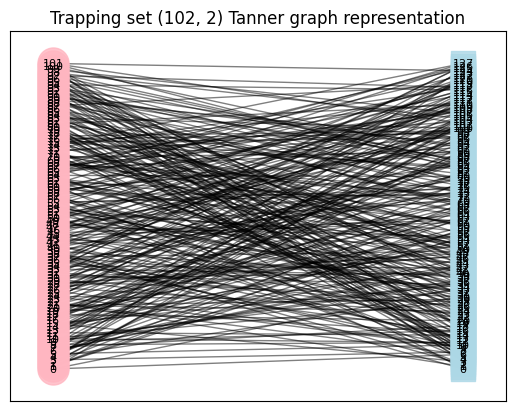

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def draw_tanner_graph(H):
    G = nx.Graph()

    # Add variable nodes to the graph
    num_variable_nodes = H.shape[1]
    G.add_nodes_from(range(num_variable_nodes), bipartite=0)

    # Add check nodes to the graph
    num_check_nodes = H.shape[0]
    G.add_nodes_from(range(num_variable_nodes, num_variable_nodes+num_check_nodes), bipartite=1)

    # Add edges to the graph using the parity-check matrix
    for i in range(num_check_nodes):
        for j in range(num_variable_nodes):
            if H[i, j] != 0:
                G.add_edge(j, num_variable_nodes + i)

    # Draw the graph
    pos = nx.bipartite_layout(G,  list(range(num_variable_nodes, num_variable_nodes+num_check_nodes)))

    # Draw variable nodes with indices
    variable_node_indices = list(range(num_variable_nodes))
    nx.draw_networkx_nodes(G, pos, nodelist=variable_node_indices, node_color='lightblue', node_size=300, alpha=0.8, node_shape="s")
    variable_labels = {i: i for i in variable_node_indices}
    nx.draw_networkx_labels(G, pos, labels=variable_labels, font_color='black', font_size=8)

    # Draw check nodes as squares with indices
    check_node_indices = list(range(num_variable_nodes, num_variable_nodes+num_check_nodes))
    nx.draw_networkx_nodes(G, pos, nodelist=check_node_indices, node_color='lightpink', node_size=500, alpha=0.8)
    check_labels = {i: i - num_variable_nodes for i in check_node_indices}
    nx.draw_networkx_labels(G, pos, labels=check_labels, font_color='black', font_size=8)

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    plt.title("Trapping set (%d, %d) Tanner graph representation" % (_a_, obj_value))
    plt.show()

# Assuming Trapping_set_submatrix is a numpy array
draw_tanner_graph(Trapping_set_submatrix.transpose())


Trapping set (102, 2) submatrix:
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0

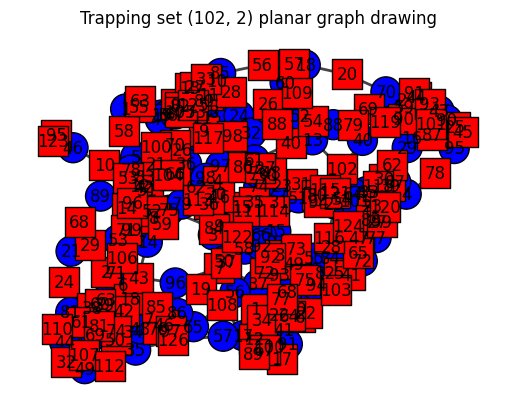

In [ ]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

def draw_tanner_graph(H):
    num_variable_nodes = H.shape[1]
    num_check_nodes = H.shape[0]

    # Create a bipartite graph
    G = ig.Graph.Bipartite([0] * num_variable_nodes + [1] * num_check_nodes, edges=[])

    # Add edges to the graph using the parity-check matrix
    edges = [(j, num_variable_nodes + i) for i in range(num_check_nodes) for j in range(num_variable_nodes) if H[i, j] != 0]
    G.add_edges(edges)

    # Set the type attribute for variable nodes starting from 0
    G.vs["type"] = [0] * num_variable_nodes + [1] * num_check_nodes

    # Define color and shape mappings
    col = ["blue", "red"]
    shape = ["circle", "square"]

    # Plot bipartite graph
    visual_style = {}
    visual_style["vertex_color"] = [col[i] for i in G.vs["type"]]
    visual_style["vertex_shape"] = [shape[i] for i in G.vs["type"]]

    # Add node indices as labels
    labels = [str(i) for i in range(num_variable_nodes)] + [str(i - num_variable_nodes) for i in range(num_variable_nodes, num_variable_nodes + num_check_nodes)]
    visual_style["vertex_label"] = labels

    fig, ax = plt.subplots()
    ig.plot(G, target=ax, **visual_style)
    plt.title("Trapping set (%d, %d) planar graph drawing" % (_a_, obj_value))
    plt.show()

print("Trapping set (%d, %d) submatrix:" % (_a_, obj_value))
print_ndarray(Trapping_set_submatrix)
# Assuming Trapping_set_submatrix is a NumPy array
draw_tanner_graph(Trapping_set_submatrix)


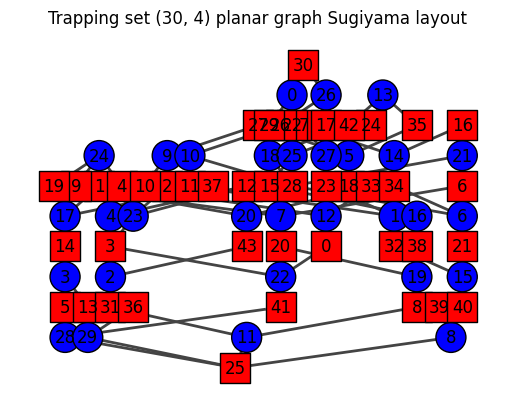

In [ ]:

import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

def draw_tanner_graph(H):
    num_variable_nodes = H.shape[1]
    num_check_nodes = H.shape[0]

    # Create a bipartite graph
    G = ig.Graph.Bipartite([0] * num_variable_nodes + [1] * num_check_nodes, edges=[])

    # Add edges to the graph using the parity-check matrix
    edges = [(j, num_variable_nodes + i) for i in range(num_check_nodes) for j in range(num_variable_nodes) if H[i, j] != 0]
    G.add_edges(edges)

    # Set the type attribute for variable nodes starting from 0
    G.vs["type"] = [0] * num_variable_nodes + [1] * num_check_nodes

    # Define color and shape mappings
    col = ["blue", "red"]
    shape = ["circle", "square"]

    # Plot bipartite graph with Sugiyama layout, a hierarchical layout
    visual_style = {}
    visual_style["vertex_color"] = [col[i] for i in G.vs["type"]]
    visual_style["vertex_shape"] = [shape[i] for i in G.vs["type"]]
    visual_style["vertex_label"] = [str(i) for i in range(num_variable_nodes)] + [str(i - num_variable_nodes) for i in range(num_variable_nodes, num_variable_nodes + num_check_nodes)]

    # Use the Sugiyama layout, a hierarchical layout
    layout = G.layout_sugiyama()

    fig, ax = plt.subplots()
    ig.plot(G, target=ax, layout=layout, **visual_style)
    plt.title("Trapping set (%d, %d) planar graph Sugiyama layout" % (_a_, obj_value))
    plt.show()

# Assuming Trapping_set_submatrix is a NumPy array
draw_tanner_graph(Trapping_set_submatrix)

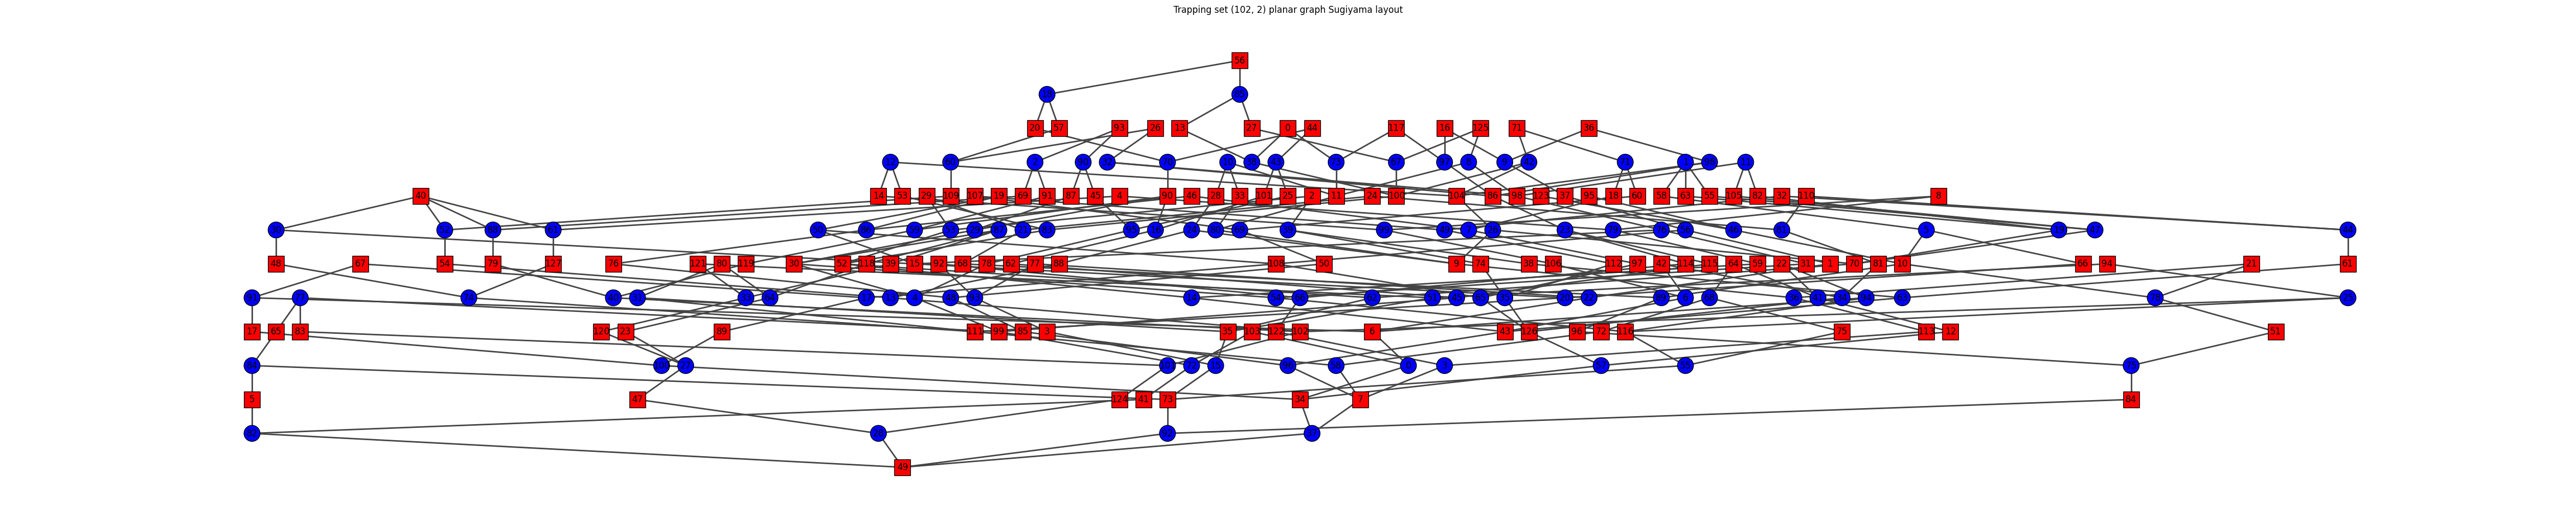

In [ ]:
def draw_tanner_graph(H):
    num_variable_nodes = H.shape[1]
    num_check_nodes = H.shape[0]

    # Create a bipartite graph
    G = ig.Graph.Bipartite([0] * num_variable_nodes + [1] * num_check_nodes, edges=[])

    # Add edges to the graph using the parity-check matrix
    edges = [(j, num_variable_nodes + i) for i in range(num_check_nodes) for j in range(num_variable_nodes) if H[i, j] != 0]
    G.add_edges(edges)

    # Set the type attribute for variable nodes starting from 0
    G.vs["type"] = [0] * num_variable_nodes + [1] * num_check_nodes

    # Define color and shape mappings
    col = ["blue", "red"]
    shape = ["circle", "square"]

    # Plot bipartite graph with Sugiyama layout, a hierarchical layout
    visual_style = {}
    visual_style["vertex_color"] = [col[i] for i in G.vs["type"]]
    visual_style["vertex_shape"] = [shape[i] for i in G.vs["type"]]
    visual_style["vertex_label"] = [str(i) for i in range(num_variable_nodes)] + [str(i - num_variable_nodes) for i in range(num_variable_nodes, num_variable_nodes + num_check_nodes)]

    # Use the Sugiyama layout, a hierarchical layout
    layout = G.layout_sugiyama()

    fig, ax = plt.subplots(figsize=(62, 12))  # Adjust the values (width, height) as needed
    ig.plot(G, target=ax, layout=layout, **visual_style)
    plt.title("Trapping set (%d, %d) planar graph Sugiyama layout" % (_a_, obj_value))
    plt.show()

# Assuming Trapping_set_submatrix is a NumPy array
draw_tanner_graph(Trapping_set_submatrix)


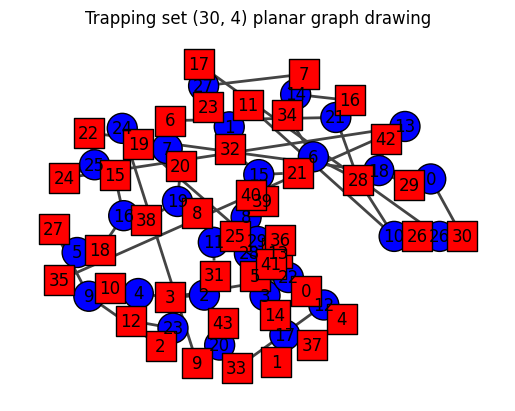

In [ ]:

import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

def draw_tanner_graph(H):
    num_variable_nodes = H.shape[1]
    num_check_nodes = H.shape[0]

    # Create a bipartite graph
    G = ig.Graph.Bipartite([0] * num_variable_nodes + [1] * num_check_nodes, edges=[])

    # Add edges to the graph using the parity-check matrix
    edges = [(j, num_variable_nodes + i) for i in range(num_check_nodes) for j in range(num_variable_nodes) if H[i, j] != 0]
    G.add_edges(edges)

    # Set the type attribute for variable nodes starting from 0
    G.vs["type"] = [0] * num_variable_nodes + [1] * num_check_nodes

    # Define color and shape mappings
    col = ["blue", "red"]
    shape = ["circle", "square"]

    # Plot bipartite graph with Force-Directed layout
    visual_style = {}
    visual_style["vertex_color"] = [col[i] for i in G.vs["type"]]
    visual_style["vertex_shape"] = [shape[i] for i in G.vs["type"]]
    visual_style["vertex_label"] = [str(i) for i in range(num_variable_nodes)] + [str(i - num_variable_nodes) for i in range(num_variable_nodes, num_variable_nodes + num_check_nodes)]

    # Use the Force-Directed layout for the graph
    layout = G.layout_reingold_tilford_circular()

    fig, ax = plt.subplots()
    ig.plot(G, target=ax, layout=layout, **visual_style)
    plt.title("Trapping set (%d, %d) planar graph drawing" % (_a_, obj_value))
    plt.show()

# Assuming Trapping_set_submatrix is a NumPy array
draw_tanner_graph(Trapping_set_submatrix)

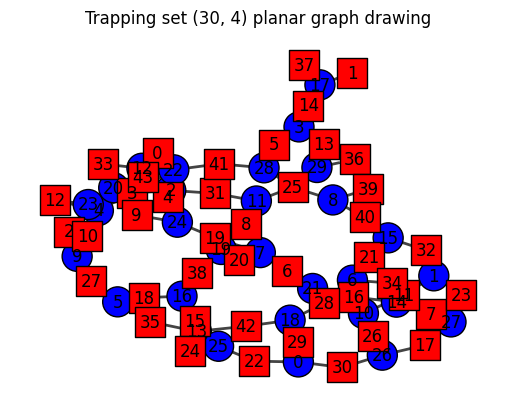

In [ ]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

def draw_tanner_graph(H):
    num_variable_nodes = H.shape[1]
    num_check_nodes = H.shape[0]

    # Create a bipartite graph
    G = ig.Graph.Bipartite([0] * num_variable_nodes + [1] * num_check_nodes, edges=[])

    # Add edges to the graph using the parity-check matrix
    edges = [(j, num_variable_nodes + i) for i in range(num_check_nodes) for j in range(num_variable_nodes) if H[i, j] != 0]
    G.add_edges(edges)

    # Set the type attribute for variable nodes starting from 0
    G.vs["type"] = [0] * num_variable_nodes + [1] * num_check_nodes

    # Define color and shape mappings
    col = ["blue", "red"]
    shape = ["circle", "square"]

    # Plot bipartite graph with Kamada-Kawai layout
    visual_style = {}
    visual_style["vertex_color"] = [col[i] for i in G.vs["type"]]
    visual_style["vertex_shape"] = [shape[i] for i in G.vs["type"]]
    visual_style["vertex_label"] = [str(i) for i in range(num_variable_nodes)] + [str(i - num_variable_nodes) for i in range(num_variable_nodes, num_variable_nodes + num_check_nodes)]

    # Use Kamada-Kawai layout for the graph
    layout = G.layout_kamada_kawai()

    fig, ax = plt.subplots()
    ig.plot(G, target=ax, layout=layout, **visual_style)
    plt.title("Trapping set (%d, %d) planar graph drawing" % (_a_, obj_value))
    plt.show()

# Assuming Trapping_set_submatrix is a NumPy array
draw_tanner_graph(Trapping_set_submatrix)


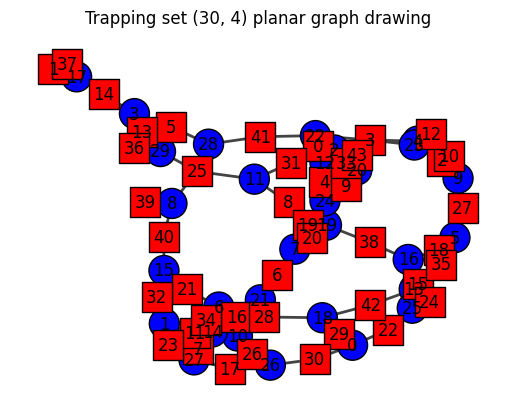

In [ ]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

def draw_tanner_graph(H):
    num_variable_nodes = H.shape[1]
    num_check_nodes = H.shape[0]

    # Create a bipartite graph
    G = ig.Graph.Bipartite([0] * num_variable_nodes + [1] * num_check_nodes, edges=[])

    # Add edges to the graph using the parity-check matrix
    edges = [(j, num_variable_nodes + i) for i in range(num_check_nodes) for j in range(num_variable_nodes) if H[i, j] != 0]
    G.add_edges(edges)

    # Set the type attribute for variable nodes starting from 0
    G.vs["type"] = [0] * num_variable_nodes + [1] * num_check_nodes

    # Define color and shape mappings
    col = ["blue", "red"]
    shape = ["circle", "square"]

    # Plot bipartite graph with Kamada-Kawai layout
    visual_style = {}
    visual_style["vertex_color"] = [col[i] for i in G.vs["type"]]
    visual_style["vertex_shape"] = [shape[i] for i in G.vs["type"]]
    visual_style["vertex_label"] = [str(i) for i in range(num_variable_nodes)] + [str(i - num_variable_nodes) for i in range(num_variable_nodes, num_variable_nodes + num_check_nodes)]

    # Use Kamada-Kawai layout for the graph
    layout = G.layout_fruchterman_reingold()

    fig, ax = plt.subplots()
    ig.plot(G, target=ax, layout=layout, **visual_style)
    plt.title("Trapping set (%d, %d) planar graph drawing" % (_a_, obj_value))
    plt.show()

# Assuming Trapping_set_submatrix is a NumPy array
draw_tanner_graph(Trapping_set_submatrix)


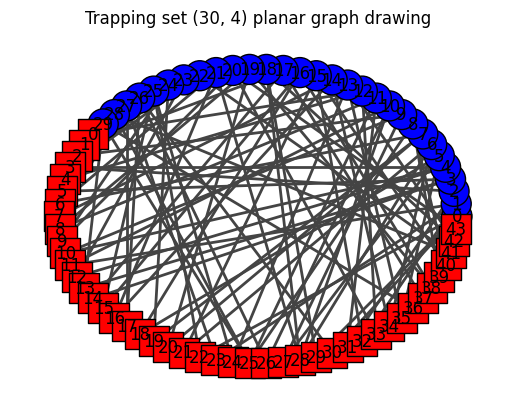

In [ ]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

def draw_tanner_graph(H):
    num_variable_nodes = H.shape[1]
    num_check_nodes = H.shape[0]

    # Create a bipartite graph
    G = ig.Graph.Bipartite([0] * num_variable_nodes + [1] * num_check_nodes, edges=[])

    # Add edges to the graph using the parity-check matrix
    edges = [(j, num_variable_nodes + i) for i in range(num_check_nodes) for j in range(num_variable_nodes) if H[i, j] != 0]
    G.add_edges(edges)

    # Set the type attribute for variable nodes starting from 0
    G.vs["type"] = [0] * num_variable_nodes + [1] * num_check_nodes

    # Define color and shape mappings
    col = ["blue", "red"]
    shape = ["circle", "square"]

    # Plot bipartite graph with a circular layout
    visual_style = {}
    visual_style["vertex_color"] = [col[i] for i in G.vs["type"]]
    visual_style["vertex_shape"] = [shape[i] for i in G.vs["type"]]
    visual_style["vertex_label"] = [str(i) for i in range(num_variable_nodes)] + [str(i - num_variable_nodes) for i in range(num_variable_nodes, num_variable_nodes + num_check_nodes)]

    # Use a circular layout for the graph
    layout = G.layout("circle")

    fig, ax = plt.subplots()
    ig.plot(G, target=ax, layout=layout, **visual_style)
    plt.title("Trapping set (%d, %d) planar graph drawing" % (_a_, obj_value))
    plt.show()

# Assuming Trapping_set_submatrix is a NumPy array
draw_tanner_graph(Trapping_set_submatrix)


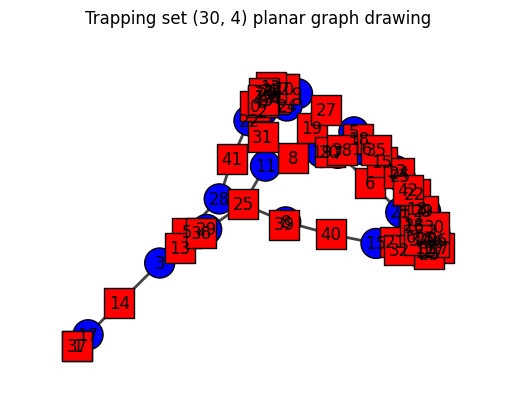

In [ ]:
#laplaciant spectral
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

def draw_tanner_graph(H):
    num_variable_nodes = H.shape[1]
    num_check_nodes = H.shape[0]

    # Create a bipartite graph
    G = ig.Graph.Bipartite([0] * num_variable_nodes + [1] * num_check_nodes, edges=[])

    # Add edges to the graph using the parity-check matrix
    edges = [(j, num_variable_nodes + i) for i in range(num_check_nodes) for j in range(num_variable_nodes) if H[i, j] != 0]
    G.add_edges(edges)

    # Set the type attribute for variable nodes starting from 0
    G.vs["type"] = [0] * num_variable_nodes + [1] * num_check_nodes

    # Define color and shape mappings
    col = ["blue", "red"]
    shape = ["circle", "square"]

    # Plot bipartite graph with spectral layout
    visual_style = {}
    visual_style["vertex_color"] = [col[i] for i in G.vs["type"]]
    visual_style["vertex_shape"] = [shape[i] for i in G.vs["type"]]
    visual_style["vertex_label"] = [str(i) for i in range(num_variable_nodes)] + [str(i - num_variable_nodes) for i in range(num_variable_nodes, num_variable_nodes + num_check_nodes)]

    # Compute Laplacian eigenmap and use it as the layout
    laplacian_matrix = np.array(G.laplacian())
    eigenvalues, eigenvectors = np.linalg.eigh(laplacian_matrix)
    layout = eigenvectors[:, 1:3]  # Use the second and third eigenvectors for 2D layout

    fig, ax = plt.subplots()
    ig.plot(G, target=ax, layout=layout, **visual_style)
    plt.title("Trapping set (%d, %d) planar graph drawing" % (_a_, obj_value))
    plt.show()

# Assuming Trapping_set_submatrix is a NumPy array
draw_tanner_graph(Trapping_set_submatrix)


In [ ]:
!pip install session-info
import session_info
session_info.show()


AttributeError: ignored

In [ ]:
cplex               22.1.1.0
igraph              0.11.3
matplotlib          3.7.1
networkx            3.2.1
numpy               1.23.5
session_info        1.0.0
-----
Click to view modules imported as dependencies
-----
IPython             7.34.0
jupyter_client      6.1.12
jupyter_core        5.5.0
notebook            6.5.5
-----
Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
Linux-5.15.120+-x86_64-with-glibc2.35
